In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys

from ng_utilities import *
from ng_core_fcns import *

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from registration_utilities import *
from annotation_utilities import *
from metadata import *
from data_manager import *

import matplotlib.pyplot as plt
%matplotlib inline

import neuroglancer
import cv2
import json

stack = 'MD585'

detector_id = 19
# detector_id = 799

with open('struct_reverse.json', 'r') as json_file:
    structure_to_color = json.load( json_file )
    
color_segments=[]
for i in range(1,50):
    color_segments.append(i)

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.


Setting environment for Precision WorkStation for Alex Newberry
{'MD589': 0.46, 'MD585': 0.46, 'UCSD001': 0.325, 'MD594': 0.46, 'DK17': 0.325}
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
Seems you are using operation INIs to provide cropbox.


/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_cropbox.ini
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD589/MD589_cropbox.ini
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD594/MD594_cropbox.ini
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD594/MD594_cropbox.ini
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_cropbox.ini


Seems you are using operation INIs to provide cropbox.
Seems you are using operation INIs to provide cropbox.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD590 anchor: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD590/operation_configs/from_none_to_aligned.ini does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD590/MD590_sorted_filenames.txt
Failed to cache MD590 sections_to_filenames: 
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD590/MD590_sorted_filenames.txt
Failed to cache MD590 filenames_to_sections: 
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD590 section_limits: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD590/operation_configs/from_none_to_aligned.ini does not exist.


# Neuroglancer code

In [2]:
#Replace: viewer = neuroglancer.Viewer()

#With: 
neuroglancer.set_server_bind_address('0.0.0.0')
viewer = neuroglancer.Viewer()
print(viewer)

ip_name = !hostname -I
print('http://' + ip_name[0].strip() + ':' + viewer.get_viewer_url().split(':')[2]) ##Remote URL

ip_name_str = str(ip_name).replace('\'','').replace('\"','').replace('[','').replace(']','')
real_ip = ip_name_str.split(' ')[0]
print('http://' + real_ip + ':' + viewer.get_viewer_url().split(':')[2]) ##Remote URL

viewer # port 41989, IP 132.239.73.85

http://yuncong-Precision-WorkStation-T7500:37759/v/038a46e2b634c63680a68f796a9d92c9779c2c99/
http://132.239.73.85 172.17.0.1:37759/v/038a46e2b634c63680a68f796a9d92c9779c2c99/
http://132.239.73.85:37759/v/038a46e2b634c63680a68f796a9d92c9779c2c99/


http://yuncong-Precision-WorkStation-T7500:37759/v/038a46e2b634c63680a68f796a9d92c9779c2c99/

In [3]:
# Sets 'Image' layer to be MD585 prep2 images from S3
with viewer.txn() as s:
    s.layers['image'] = neuroglancer.ImageLayer(source='precomputed://https://mousebrainatlas-datajoint-jp2k.s3.amazonaws.com/precomputed/MD585_fullres')
    
    # Resets X/Y/Z plane orientation
    s.navigation.pose.orientation = [0,0,0,1]
    # Zooms out 
#     s.navigation.zoomFactor = 10000 # If 4panel
    s.navigation.zoomFactor = 5000 # If xy
    
    # Resets 3D Viewer Orientation
    s.perspectiveOrientation = [0,0,0,1]
    # Zooms out
    s.perspectiveZoom = 75000
    
    s.layout = 'xy' # '3d'/'4panel'/'xy'
    
# with viewer.txn() as s:
#     print s.layers['navigation']
    
#neuroglancer.stop()

In [9]:
neuroglancer.stop()

# Populate Viewer

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.


Number of valid sections:
44
First valid section: 180
Last valid section: 223
num_valid_sections: 44



(43, 62, 114)


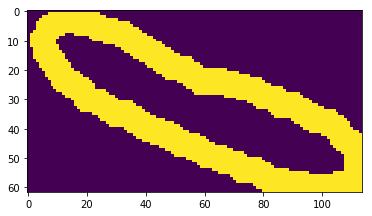

In [5]:
stack = 'MD585'
structure = '12N'
# color_codes{'blue:'1,'red',2,'yellow':3}

str_contour, first_sec, last_sec = image_contour_generator( stack, detector_id, structure, use_local_alignment=True, image_prep=2, threshold=0.2)

ng_structure_volume_normal = add_structure_to_neuroglancer( viewer, str_contour, structure, stack, first_sec, last_sec, \
                                                    color_radius=5, xy_ng_resolution_um=10, threshold=0.2, color=5, \
                                                    solid_volume=False, no_offset_big_volume=False, save_results=False, \
                                                    return_with_offsets=False, add_to_ng=True, human_annotation=False)

plt.imshow(ng_structure_volume_normal[20,:,:])

In [8]:
stack = 'MD585'

for structure in ['12N', 'SNR_R']:
    str_contour, first_sec, last_sec = image_contour_generator( stack, detector_id, structure, use_local_alignment=True, image_prep=2, threshold=0.2)

    add_structure_to_neuroglancer( viewer, str_contour, structure, stack, first_sec, last_sec, \
                                  color_radius=5, xy_ng_resolution_um=10, threshold=0.2, color=1, \
                                  solid_volume=False, no_offset_big_volume=False, save_results=False,\
                                  return_with_offsets=False, add_to_ng=True, human_annotation=False)

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.


Number of valid sections:
44
First valid section: 180
Last valid section: 223
num_valid_sections: 44



(43, 62, 114)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
2 contours of reconstructed volume is found at position 145 ([24, 1]). Use the longest one.
3 contours of reconstructed volume is found at position 147 ([7, 3, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 17 ([11, 3]). Use the longest one.


Number of valid sections:
71
First valid section: 260
Last valid section: 330
num_valid_sections: 71



(70, 114, 148)


In [12]:
stack = 'MD585'

for structure in all_structures_total:
    str_contour, first_sec, last_sec = image_contour_generator( stack, detector_id, structure, use_local_alignment=True, image_prep=2, threshold=0.2)

    add_structure_to_neuroglancer( viewer, str_contour, structure, stack, first_sec, last_sec, \
                                  color_radius=5, xy_ng_resolution_um=10, threshold=0.2, color=1, \
                                  solid_volume=False, no_offset_big_volume=False, save_results=False,\
                                  return_with_offsets=False, add_to_ng=True, human_annotation=False)

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
2 contours of reconstructed volume is found at position 10 ([6, 3]). Use the longest one.
2 contours of reconstructed volume is found at position 52 ([2, 1]). Use the longest one.
contour has less than three vertices. Ignore.


Number of valid sections:
21
First valid section: 188
Last valid section: 208
num_valid_sections: 21



(20, 30, 58)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.


Number of valid sections:
44
First valid section: 180
Last valid section: 223
num_valid_sections: 44



(43, 62, 114)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.


KeyboardInterrupt: 

In [9]:
20*33.5*2

1340.0

In [7]:
33.5*40*2

2680.0

In [53]:
! ls

Alex_3D_Manipulator.ipynb
Find Patches.ipynb
MD585_visualization_global_alignment_spec.json
MD585_visualization_per_structure_alignment_spec.json
neuroglancer_contour_generator_1.ipynb
neuroglancer_contour_generator_2.ipynb
neuroglancer_contour_generator_3.ipynb
neuroglancer_contour_generator_4.ipynb
ng_core_fcns.py
ng_core_fcns.pyc
ng_utilities.py
ng_utilities.pyc
struct_reverse_2.json
struct_reverse.json


In [65]:
# CRAETE ENTIRE BRAIN VOLUME
xy_ng_resolution_um = 5

stack = 'MD585'
MD585_ng_section_min = 83
MD585_ng_section_max = 536

with open('struct_reverse_2.json', 'r') as json_file:
    structure_to_color = json.load( json_file )

    
# MD585: x_um = 35617,           y_um = 26086
# MD585: x_pixels_.46res = x_um*0.46,  y_pixels_.46res = y_um*0.46
# MD585: x_pixels_newres = x_pixels_.46res*(0.46/newres), y_pixels_newres = y_pixels_.46res*(0.46/newres)
# microns/resolution
y_voxels = int( 26086*0.46*(.46/xy_ng_resolution_um) + 0.5)
x_voxels = int( 35617*0.46*(.46/xy_ng_resolution_um) + 0.5)
full_brain_volumes = np.zeros((268,y_voxels,x_voxels), dtype=np.uint8)

for structure in all_structures_total:
    str_contour, first_sec, last_sec = image_contour_generator( stack, detector_id, structure, use_local_alignment=True, image_prep=2, threshold=0.5)
    
    try:
        color=structure_to_color[structure]
    except:
        color=2
    
    str_volume, xyz_offsets = add_structure_to_neuroglancer( viewer, str_contour, structure, stack, first_sec, last_sec, \
                                          color_radius=5, xy_ng_resolution_um=xy_ng_resolution_um, threshold=0.5, color=color, \
                                          solid_volume=False, no_offset_big_volume=True, save_results=False, return_with_offsets=True, \
                                          add_to_ng=False, human_annotation=False )
    
    z_len, y_len, x_len = np.shape(str_volume)
    full_brain_volumes[0:z_len, 0:y_len, 0:x_len] += str_volume



color_segments=[]
for i in range(1,50):
    color_segments.append(i)

with viewer.txn() as s:
    #s.layers[ display_name ] = neuroglancer.SegmentationLayer(
    s.layers[ "full_brain" ] = neuroglancer.SegmentationLayer(
        source = neuroglancer.LocalVolume(
            data=full_brain_volumes, # Z,Y,X
            voxel_size=[ xy_ng_resolution_um*1000, xy_ng_resolution_um*1000,20000], # X Y Z
            voxel_offset = [ 0, 0, 0] # X Y Z
        ),
        segments = color_segments
    )

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
2 contours of reconstructed volume is found at position 48 ([2, 1]). Use the longest one.
contour has less than three vertices. Ignore.


Number of valid sections:
17
First valid section: 190
Last valid section: 206
num_valid_sections: 17



(16, 49, 101)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
contour has less than three vertices. Ignore.
2 contours of reconstructed volume is found at position 96 ([16, 1]). Use the longest one.


Number of valid sections:
40
First valid section: 182
Last valid section: 221
num_valid_sections: 40



(39, 115, 205)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.


Number of valid sections:
83
First valid section: 177
Last valid section: 259
num_valid_sections: 83



(82, 167, 215)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
4 contours of reconstructed volume is found at position 31 ([8, 4, 3, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 371 ([19, 1]). Use the longest one.


Number of valid sections:
171
First valid section: 138
Last valid section: 308
num_valid_sections: 171



(170, 381, 405)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
2 contours of reconstructed volume is found at position 378 ([57, 1]). Use the longest one.


Number of valid sections:
184
First valid section: 131
Last valid section: 314
num_valid_sections: 184



(183, 341, 273)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
2 contours of reconstructed volume is found at position 57 ([29, 1]). Use the longest one.
3 contours of reconstructed volume is found at position 59 ([7, 5, 2]). Use the longest one.
2 contours of reconstructed volume is found at position 55 ([17, 1]). Use the longest one.


Number of valid sections:
26
First valid section: 270
Last valid section: 295
num_valid_sections: 26



(25, 143, 111)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
2 contours of reconstructed volume is found at position 12 ([14, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 56 ([15, 3]). Use the longest one.


Number of valid sections:
23
First valid section: 136
Last valid section: 158
num_valid_sections: 23



(22, 145, 121)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.


Number of valid sections:
10
First valid section: 232
Last valid section: 241
num_valid_sections: 10



(9, 35, 35)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.


Number of valid sections:
9
First valid section: 188
Last valid section: 196
num_valid_sections: 9



(8, 35, 37)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
contour has less than three vertices. Ignore.
2 contours of reconstructed volume is found at position 47 ([50, 1]). Use the longest one.


Number of valid sections:
36
First valid section: 253
Last valid section: 288
num_valid_sections: 36



(35, 159, 159)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.


Number of valid sections:
44
First valid section: 139
Last valid section: 182
num_valid_sections: 44



(43, 103, 179)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
contour has less than three vertices. Ignore.


Number of valid sections:
80
First valid section: 228
Last valid section: 307
num_valid_sections: 80



(79, 145, 123)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
2 contours of reconstructed volume is found at position 13 ([1, 1]). Use the longest one.
contour has less than three vertices. Ignore.
3 contours of reconstructed volume is found at position 23 ([1, 1, 1]). Use the longest one.
contour has less than three vertices. Ignore.


Number of valid sections:
74
First valid section: 113
Last valid section: 186
num_valid_sections: 74



(73, 75, 213)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.


Number of valid sections:
8
First valid section: 262
Last valid section: 269
num_valid_sections: 8



(7, 39, 67)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.


Number of valid sections:
6
First valid section: 133
Last valid section: 138
num_valid_sections: 6



(5, 37, 71)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
2 contours of reconstructed volume is found at position 41 ([13, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 17 ([17, 1]). Use the longest one.


Number of valid sections:
16
First valid section: 249
Last valid section: 264
num_valid_sections: 16



(15, 119, 113)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
2 contours of reconstructed volume is found at position 37 ([13, 4]). Use the longest one.
2 contours of reconstructed volume is found at position 13 ([15, 3]). Use the longest one.


Number of valid sections:
14
First valid section: 166
Last valid section: 179
num_valid_sections: 14



(13, 117, 117)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
2 contours of reconstructed volume is found at position 82 ([21, 3]). Use the longest one.
2 contours of reconstructed volume is found at position 52 ([59, 1]). Use the longest one.


Number of valid sections:
35
First valid section: 249
Last valid section: 283
num_valid_sections: 35



(34, 145, 229)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
2 contours of reconstructed volume is found at position 13 ([5, 1]). Use the longest one.
4 contours of reconstructed volume is found at position 93 ([23, 5, 1, 1]). Use the longest one.
3 contours of reconstructed volume is found at position 89 ([13, 1, 1]). Use the longest one.


Number of valid sections:
41
First valid section: 138
Last valid section: 178
num_valid_sections: 41



(40, 111, 205)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
2 contours of reconstructed volume is found at position 14 ([10, 7]). Use the longest one.


Number of valid sections:
52
First valid section: 227
Last valid section: 278
num_valid_sections: 52



(51, 159, 187)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
2 contours of reconstructed volume is found at position 110 ([9, 5]). Use the longest one.


Number of valid sections:
53
First valid section: 163
Last valid section: 215
num_valid_sections: 53



(52, 171, 189)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
contour has less than three vertices. Ignore.
2 contours of reconstructed volume is found at position 22 ([14, 1]). Use the longest one.


Number of valid sections:
36
First valid section: 207
Last valid section: 242
num_valid_sections: 36



(35, 65, 141)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
3 contours of reconstructed volume is found at position 12 ([24, 3, 1]). Use the longest one.
contour has less than three vertices. Ignore.
2 contours of reconstructed volume is found at position 16 ([47, 3]). Use the longest one.


Number of valid sections:
23
First valid section: 184
Last valid section: 206
num_valid_sections: 23



(22, 49, 175)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
3 contours of reconstructed volume is found at position 32 ([5, 3, 2]). Use the longest one.
2 contours of reconstructed volume is found at position 100 ([12, 7]). Use the longest one.
2 contours of reconstructed volume is found at position 36 ([9, 6]). Use the longest one.
2 contours of reconstructed volume is found at position 96 ([3, 1]). Use the longest one.


Number of valid sections:
35
First valid section: 281
Last valid section: 315
num_valid_sections: 35



(34, 359, 151)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
contour has less than three vertices. Ignore.
3 contours of reconstructed volume is found at position 87 ([3, 2, 1]). Use the longest one.


Number of valid sections:
39
First valid section: 123
Last valid section: 161
num_valid_sections: 39



(38, 355, 137)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.


Number of valid sections:
29
First valid section: 234
Last valid section: 262
num_valid_sections: 29



(28, 93, 103)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
contour has less than three vertices. Ignore.


Number of valid sections:
29
First valid section: 182
Last valid section: 210
num_valid_sections: 29



(28, 95, 115)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
contour has less than three vertices. Ignore.
2 contours of reconstructed volume is found at position 78 ([7, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 84 ([4, 2]). Use the longest one.
2 contours of reconstructed volume is found at position 86 ([5, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 88 ([2, 1]). Use the longest one.
contour has less than three vertices. Ignore.
3 contours of reconstructed volume is found at position 90 ([2, 1, 1]). Use the longest one.
contour has less than three vertices. Ignore.
2 contours of reconstructed volume is found at position 92 ([3, 2]). Use the longest one.


Number of valid sections:
45
First valid section: 239
Last valid section: 283
num_valid_sections: 45



(44, 79, 167)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
contour has less than three vertices. Ignore.
2 contours of reconstructed volume is found at position 36 ([3, 2]). Use the longest one.
2 contours of reconstructed volume is found at position 38 ([3, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 46 ([6, 1]). Use the longest one.


Number of valid sections:
44
First valid section: 144
Last valid section: 187
num_valid_sections: 44



(43, 163, 103)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
2 contours of reconstructed volume is found at position 13 ([25, 2]). Use the longest one.
2 contours of reconstructed volume is found at position 141 ([14, 4]). Use the longest one.
2 contours of reconstructed volume is found at position 17 ([11, 3]). Use the longest one.


Number of valid sections:
65
First valid section: 263
Last valid section: 327
num_valid_sections: 65



(64, 211, 273)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
2 contours of reconstructed volume is found at position 140 ([9, 2]). Use the longest one.


Number of valid sections:
66
First valid section: 121
Last valid section: 186
num_valid_sections: 66



(65, 267, 217)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
3 contours of reconstructed volume is found at position 37 ([4, 2, 1]). Use the longest one.


Number of valid sections:
12
First valid section: 222
Last valid section: 233
num_valid_sections: 12



(11, 63, 91)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.


Number of valid sections:
13
First valid section: 209
Last valid section: 221
num_valid_sections: 13



(12, 61, 87)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
contour has less than three vertices. Ignore.
contour has less than three vertices. Ignore.


Number of valid sections:
7
First valid section: 230
Last valid section: 236
num_valid_sections: 7



(6, 25, 25)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
contour has less than three vertices. Ignore.


Number of valid sections:
7
First valid section: 204
Last valid section: 210
num_valid_sections: 7



(6, 27, 21)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
2 contours of reconstructed volume is found at position 89 ([59, 1]). Use the longest one.
3 contours of reconstructed volume is found at position 97 ([23, 1, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 75 ([69, 1]). Use the longest one.
3 contours of reconstructed volume is found at position 93 ([11, 3, 3]). Use the longest one.


Number of valid sections:
42
First valid section: 272
Last valid section: 313
num_valid_sections: 42



(41, 213, 219)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
4 contours of reconstructed volume is found at position 14 ([6, 3, 1, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 20 ([2, 1]). Use the longest one.
contour has less than three vertices. Ignore.
3 contours of reconstructed volume is found at position 40 ([68, 1, 1]). Use the longest one.


Number of valid sections:
41
First valid section: 101
Last valid section: 141
num_valid_sections: 41



(40, 235, 153)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
2 contours of reconstructed volume is found at position 81 ([82, 3]). Use the longest one.
4 contours of reconstructed volume is found at position 75 ([89, 3, 3, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 77 ([68, 3]). Use the longest one.
2 contours of reconstructed volume is found at position 83 ([17, 1]). Use the longest one.


Number of valid sections:
35
First valid section: 280
Last valid section: 314
num_valid_sections: 35



(34, 249, 307)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
4 contours of reconstructed volume is found at position 22 ([7, 3, 1, 1]). Use the longest one.
3 contours of reconstructed volume is found at position 24 ([57, 25, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 26 ([76, 63]). Use the longest one.
3 contours of reconstructed volume is found at position 68 ([85, 2, 1]). Use the longest one.
3 contours of reconstructed volume is found at position 72 ([56, 3, 1]). Use the longest one.
5 contours of reconstructed volume is found at position 80 ([5, 5, 2, 1, 1]). Use the longest one.
contour has less than three vertices. Ignore.
3 contours of reconstructed volume is found at position 28 ([15, 2, 2]). Use the longest one.
6 contours of reconstructed volume is found at position 30 ([56, 28, 11, 1, 1, 1]). Use the longest one.
3 contours of reconstructed volume is found at position 32 ([84, 40, 1]). Use the longest one.
3 contours of reconstructed volume 

Number of valid sections:
30
First valid section: 114
Last valid section: 143
num_valid_sections: 30



(29, 213, 343)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
2 contours of reconstructed volume is found at position 71 ([6, 5]). Use the longest one.
2 contours of reconstructed volume is found at position 73 ([9, 8]). Use the longest one.
2 contours of reconstructed volume is found at position 77 ([18, 2]). Use the longest one.
2 contours of reconstructed volume is found at position 79 ([29, 12]). Use the longest one.
2 contours of reconstructed volume is found at position 107 ([10, 3]). Use the longest one.
2 contours of reconstructed volume is found at position 109 ([11, 7]). Use the longest one.
4 contours of reconstructed volume is found at position 111 ([12, 9, 2, 1]). Use the longest one.
3 contours of reconstructed volume is found at position 113 ([13, 11, 9]). Use the longest one.
3 contours of reconstructed volume is found at position 115 ([15, 13, 12]). Use the longest one.
3 contours of reconstructed volume is found at position 117 ([18, 15, 14]). Use the longest one.
2 contours

Number of valid sections:
85
First valid section: 206
Last valid section: 290
num_valid_sections: 85



(84, 235, 187)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
2 contours of reconstructed volume is found at position 91 ([93, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 99 ([90, 2]). Use the longest one.
2 contours of reconstructed volume is found at position 151 ([15, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 27 ([11, 7]). Use the longest one.
2 contours of reconstructed volume is found at position 89 ([77, 1]). Use the longest one.


Number of valid sections:
69
First valid section: 108
Last valid section: 176
num_valid_sections: 69



(68, 265, 247)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
3 contours of reconstructed volume is found at position 35 ([2, 1, 1]). Use the longest one.
contour has less than three vertices. Ignore.
contour has less than three vertices. Ignore.
contour has less than three vertices. Ignore.


Number of valid sections:
10
First valid section: 301
Last valid section: 310
num_valid_sections: 10



(9, 99, 81)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
2 contours of reconstructed volume is found at position 35 ([7, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 17 ([5, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 31 ([1, 1]). Use the longest one.
contour has less than three vertices. Ignore.


Number of valid sections:
12
First valid section: 126
Last valid section: 137
num_valid_sections: 12



(11, 105, 67)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
contour has less than three vertices. Ignore.
2 contours of reconstructed volume is found at position 36 ([9, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 48 ([15, 4]). Use the longest one.
2 contours of reconstructed volume is found at position 54 ([11, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 56 ([3, 1]). Use the longest one.


Number of valid sections:
26
First valid section: 197
Last valid section: 222
num_valid_sections: 26



(25, 87, 171)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
2 contours of reconstructed volume is found at position 38 ([53, 1]). Use the longest one.
9 contours of reconstructed volume is found at position 42 ([10, 7, 3, 3, 3, 2, 2, 1, 1]). Use the longest one.
contour has less than three vertices. Ignore.
2 contours of reconstructed volume is found at position 22 ([6, 3]). Use the longest one.
2 contours of reconstructed volume is found at position 32 ([24, 1]). Use the longest one.
3 contours of reconstructed volume is found at position 34 ([25, 7, 1]). Use the longest one.
6 contours of reconstructed volume is found at position 38 ([7, 2, 2, 2, 2, 1]). Use the longest one.


Number of valid sections:
16
First valid section: 177
Last valid section: 192
num_valid_sections: 16



(15, 97, 183)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
2 contours of reconstructed volume is found at position 89 ([39, 1]). Use the longest one.
5 contours of reconstructed volume is found at position 87 ([6, 2, 1, 1, 1]). Use the longest one.


Number of valid sections:
40
First valid section: 308
Last valid section: 347
num_valid_sections: 40



(39, 133, 193)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
3 contours of reconstructed volume is found at position 15 ([25, 3, 1]). Use the longest one.
4 contours of reconstructed volume is found at position 19 ([20, 3, 2, 1]). Use the longest one.


Number of valid sections:
38
First valid section: 72
Last valid section: 109
num_valid_sections: 38



(26, 155, 211)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
4 contours of reconstructed volume is found at position 84 ([6, 5, 2, 2]). Use the longest one.
2 contours of reconstructed volume is found at position 72 ([35, 1]). Use the longest one.
5 contours of reconstructed volume is found at position 80 ([13, 2, 2, 1, 1]). Use the longest one.


Number of valid sections:
35
First valid section: 306
Last valid section: 340
num_valid_sections: 35



(34, 177, 105)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
3 contours of reconstructed volume is found at position 14 ([12, 4, 2]). Use the longest one.
2 contours of reconstructed volume is found at position 52 ([5, 2]). Use the longest one.


Number of valid sections:
27
First valid section: 84
Last valid section: 110
num_valid_sections: 27



(26, 131, 177)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
contour has less than three vertices. Ignore.
2 contours of reconstructed volume is found at position 47 ([1, 1]). Use the longest one.
contour has less than three vertices. Ignore.


Number of valid sections:
52
First valid section: 285
Last valid section: 336
num_valid_sections: 52



(51, 117, 181)
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.
2 contours of reconstructed volume is found at position 24 ([47, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 110 ([3, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 18 ([3, 2]). Use the longest one.
2 contours of reconstructed volume is found at position 102 ([3, 2]). Use the longest one.


Number of valid sections:
49
First valid section: 86
Last valid section: 134
num_valid_sections: 49



(48, 127, 193)


In [22]:
color_array = np.ones((1,80,80), dtype=np.uint8)
color_array[0,0:49,0]= np.array(color_segments)
color_array[0,0,0:49]= np.array(color_segments)


with viewer.txn() as s:
    #s.layers[ display_name ] = neuroglancer.SegmentationLayer(
    s.layers[ "color_test" ] = neuroglancer.SegmentationLayer(
        source = neuroglancer.LocalVolume(
            data= color_array, # Z,Y,X
            voxel_size=[ 50000, 50000,200000], # X Y Z
            voxel_offset = [ 0, 0, 0] # X Y Z
        ),
        segments = color_segments
    )

# Human Annotation Contours

In [16]:
! ls $ROOT_DIR/CSHL_labelings_v3/MD585/MD585_annotation_contours_05302018161849.hdf

MD585_annotation_contours_05302018161849.hdf
MD585_annotation_grid_indices.h5
MD585_annotation_v3.h5
MD585_annotation_win1_05302018161849_grid_indices_lookup.hdf
MD585_annotation_win12_05302018161849_grid_indices_lookup.hdf
MD585_annotation_win7_08012017212649_grid_indices_lookup.hdf


In [4]:
hand_annotations

,class,creator,edits,filename,id,label_position,name,orientation,parent_structure,resolution,section,side,side_manually_assigned,time_created,type,vertices
100036296937084,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'092...",MD585-IHC36-2015.08.19-13.58.57_MD585_2_0107,100036296937084,"[13080.837214540526, 7387.503199898545]",AP,sagittal,[],raw,202,S,False,09222016024603,intersected,"[[13259.819506060634, 7645.56732020058], [1312..."
10015723125855,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'092...",MD585-N40-2015.07.16-22.14.28_MD585_3_0120,10015723125855,"[9025.370144912535, 7247.111095440339]",6N,sagittal,[],raw,227,R,False,09222016025737,intersected,"[[9027.597816342317, 7434.304678343162], [8907..."
100237987620563,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'092...",MD585-IHC45-2015.08.19-14.42.34_MD585_1_0133,100237987620563,"[8838.027965926485, 7249.3865284634285]",7n,sagittal,[],raw,254,R,False,09222016041752,intersected,"[[8871.081033387087, 7479.032006868436], [8719..."
100448336531382,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'092...",MD585-IHC54-2015.08.19-15.16.31_MD585_3_0162,100448336531382,"[10886.398705370753, 5954.318125514667]",DC,sagittal,[],raw,312,R,False,09222016043501,intersected,"[[10449.447748524162, 5534.234633701799], [106..."
100582158146204,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'092...",MD585-N30-2015.08.19-15.56.52_MD585_2_0089,100582158146204,"[3256.469587333311, 7386.50706096873]",SNC,sagittal,[],raw,165,L,False,09222016020017,confirmed,"[[2835.555741797976, 7802.832642674855], [2784..."
100771157871268,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'052...",MD585-N31-2015.08.19-16.01.47_MD585_2_0092,100771157871268,"[5067.047479683606, 2410.666311383578]",SC,sagittal,[],raw,171,S,False,05212018134105,intersected,"[[4165.952328795756, 3945.624446644497], [4078..."
100897644135967,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'073...",MD585-IHC27-2015.08.19-13.28.05_MD585_3_0081,100897644135967,"[11327.352868089863, 3604.268687996473]",Cb,sagittal,[],raw,150,L,False,07312017142741,intersected,"[[8134.087712746677, 4095.6628630662253], [822..."
100914993442758,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'092...",MD585-IHC51-2015.08.19-15.03.10_MD585_2_0152,100914993442758,"[9533.132468964344, 9093.954016663858]",7N,sagittal,[],raw,292,R,False,09222016041734,intersected,"[[9431.839769079574, 9313.490734014078], [9287..."
100925817287357,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'092...",MD585-N51-2015.07.16-23.10.35_MD585_3_0153,100925817287357,"[10799.01193924603, 5841.368864737082]",DC,sagittal,[],raw,293,R,False,09222016045122,intersected,"[[11014.68126960456, 6119.675781544182], [1090..."
101056848027734,contour,yuncong,"[{u'username': u'yuncong', u'timestamp': u'052...",MD585-N36-2015.07.16-21.53.31_MD585_3_0108,101056848027734,"[8048.484147324536, 1294.4927394179967]",IC,sagittal,[],raw,203,S,False,05212018135633,intersected,"[[7963.237755906797, 2655.8547954035776], [789..."


In [3]:
hand_annotations = load_hdf_v2(ROOT_DIR+'/CSHL_labelings_v3/MD585/MD585_annotation_contours_05302018161849.hdf')\
# Converts thw weird coordinate frame to a normal-ass prep2 raw frame
hand_annotations = convert_annotation_v3_original_to_aligned_cropped_v2(\
                                        hand_annotations, stack=stack,\
                                        out_resolution='raw',
                                        prep_id=2)


num_annotations = len(hand_annotations)
#hand_annotations.keys()


MD585_ng_section_min = 83
MD585_ng_section_max = 536
# For sections before the 22nd section there is a weird offset that this compensates for
MD585_abberation_correction = [9872, 4258] # UNUSED Currently

def get_dense_coordinates( coor_list ):
    dense_coor_list = []
    # Shortest distance, x, y

    #for x, y in coor_list:
    for i in range(len(coor_list)-1):
        x, y = coor_list[i]
        x_next, y_next = coor_list[i+1]
        
        x_mid = (x+x_next)/2
        y_mid = (y+y_next)/2
        
        
        dense_coor_list.append([x,y])
        dense_coor_list.append( [x_mid, y_mid] )
        
        if i==len(coor_list)-2:
            dense_coor_list.append( [x_next, y_next] )
            x, y = coor_list[0]
            x_mid = (x+x_next)/2
            y_mid = (y+y_next)/2
            dense_coor_list.append( [x_mid, y_mid] )
        
    return dense_coor_list

def get_contours_from_annotations( target_str, densify=0 ):
    str_contours_annotation = {}

    for i in range(num_annotations):
        structure = hand_annotations['name'][i]
        side = hand_annotations['side'][i]
        section = hand_annotations['section'][i]
        
        if side=='R' or side=='L':
            structure = structure+'_'+side
            
        if structure==target_str:
            vertices = hand_annotations['vertices'][i]
            
            for i in range(densify):
                vertices = get_dense_coordinates( vertices )
            
            # Skip sections before the 22nd prep2 section
            if section < MD585_ng_section_min+22:
                #vertices = vertices - np.array(MD585_abberation_correction)
                continue

            str_contours_annotation[section] = {}
            str_contours_annotation[section][structure] = {}
            str_contours_annotation[section][structure][1] = vertices

    first_sec = np.min(str_contours_annotation.keys())
    last_sec = np.max(str_contours_annotation.keys())
    
    return str_contours_annotation, first_sec, last_sec

/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_cropbox.ini


Seems you are using operation INIs to provide cropbox.


In [6]:
# for target_str in all_structures_total[0:3]:
for target_str in ['12N']:
    str_contours_annotation, first_sec, last_sec = get_contours_from_annotations( target_str )

    ng_structure_volume = add_structure_to_neuroglancer( viewer, str_contours_annotation, target_str, stack, first_sec, last_sec, \
                                                    color_radius=5, xy_ng_resolution_um=2, threshold=1, color=4, \
                                                    solid_volume=False, no_offset_big_volume=False, save_results=False, \
                                                    return_with_offsets=False, add_to_ng=True, human_annotation=True )

(37, 427, 514)


In [ ]:
# microns
#full_brain_volumes = np.zeros((536-83,551,753), dtype=np.uint8)
# microns/resolution
full_brain_volume

In [ ]:
# REAL
# 16384 x 12000 pixels raw
# 35617 x 26086 um raw

In [13]:
# Add all annotated brains to the viewer
xy_ng_resolution_um = 5
color_radius = 3

# MD585: x_um = 35617,           y_um = 26086
# MD585: x_pixels_.46res = x_um*0.46,  y_pixels_.46res = y_um*0.46
# MD585: x_pixels_newres = x_pixels_.46res*(0.46/newres), y_pixels_newres = y_pixels_.46res*(0.46/newres)
# microns/resolution
y_voxels = int( 26086*0.46*(.46/xy_ng_resolution_um) + 0.5)
x_voxels = int( 35617*0.46*(.46/xy_ng_resolution_um) + 0.5)
full_brain_volume_annotated = np.zeros((268,y_voxels,x_voxels), dtype=np.uint8)

for target_str in all_structures_total:
    print(target_str)
    str_contours_annotation, first_sec, last_sec = get_contours_from_annotations( target_str, densify=4 )
    
    try:
        color=structure_to_color[target_str]
    except Exception as e:
        print(e)
        color=4
    
    str_volume, xyz_str_offsets = add_structure_to_neuroglancer( \
                            viewer, str_contours_annotation, target_str, stack, first_sec, last_sec, \
                            color_radius=color_radius, xy_ng_resolution_um=xy_ng_resolution_um, threshold=1, color=color, \
                            solid_volume=False, no_offset_big_volume=True, save_results=True, \
                            return_with_offsets=True, add_to_ng=False, human_annotation=True  )
    
    z_len, y_len, x_len = np.shape(str_volume)
#     full_brain_volume_annotated[0:z_len, 0:y_len, 0:x_len] = str_volume.copy()
    for z in range( xyz_str_offsets[2], z_len ):
        for y in range( xyz_str_offsets[1], y_len ):
            for x in range( xyz_str_offsets[0], x_len ):
                structure_val = str_volume[z, y, x]
                if structure_val==0:
                    continue
                else:
                    full_brain_volume_annotated[z, y, x] = structure_val
    
with viewer.txn() as s:
    s.layers[ "MD585_Atlas" ] = neuroglancer.SegmentationLayer(
        source = neuroglancer.LocalVolume(
            data=full_brain_volume_annotated, # Z,Y,X
            voxel_size=[ xy_ng_resolution_um*1000, xy_ng_resolution_um*1000,20000], # X Y Z
            voxel_offset = [ 0, 0, 0] # X Y Z
        ),
        segments = color_segments
    )

AP
(15, 69, 126)
12N
(37, 172, 206)
RtTg
'RtTg'
(84, 194, 299)
SC
(182, 385, 432)
IC
(185, 440, 403)
5N_R
(23, 143, 145)
5N_L
(22, 160, 146)
6N_R
(8, 44, 48)
6N_L
(11, 41, 54)
7N_R
(42, 126, 202)
7N_L
(42, 119, 172)
7n_R
'7n_R'
(71, 210, 165)
7n_L
'7n_L'
(55, 260, 261)
Amb_R
'Amb_R'
(7, 48, 98)
Amb_L
'Amb_L'
(6, 57, 142)
LC_R
(8, 135, 160)
LC_L
(8, 138, 141)
LRt_R
'LRt_R'
(27, 184, 246)
LRt_L
'LRt_L'
(29, 186, 258)
Pn_R
'Pn_R'
(55, 162, 219)
Pn_L
'Pn_L'
(54, 161, 226)
Tz_R
'Tz_R'
(28, 72, 185)
Tz_L
'Tz_L'
(25, 80, 204)
VLL_R
(26, 374, 168)
VLL_L
(35, 399, 163)
RMC_R
(42, 124, 155)
RMC_L
(29, 116, 105)
SNC_R
(43, 152, 131)
SNC_L
(45, 200, 150)
SNR_R
(68, 287, 263)
SNR_L
(62, 280, 249)
3N_R
(18, 64, 114)
3N_L
(8, 67, 111)
4N_R
(9, 43, 39)
4N_L
(9, 40, 39)
Sp5I_R
'Sp5I_R'
(41, 249, 195)
Sp5I_L
'Sp5I_L'
(33, 258, 234)
Sp5O_R
'Sp5O_R'
(41, 226, 403)
Sp5O_L
'Sp5O_L'
(32, 240, 381)
Sp5C_R
'Sp5C_R'
(22, 273, 241)
Sp5C_L
'Sp5C_L'
(22, 245, 185)
PBG_R
(16, 104, 89)
PBG_L
(13, 140, 130)
10N_R
(19

In [14]:
NEUROGLANCER_ROOT = '/media/alexn/BstemAtlasDataBackup/neuroglancer_volumes/'
full_annotation_fp = NEUROGLANCER_ROOT+stack+'/human_annotation/solid_volume_'+str(xy_ng_resolution_um)+'um/'

if not os.path.exists( full_annotation_fp ):
    os.makedirs(full_annotation_fp)
    
np.save( full_annotation_fp+'volume_colored.npy', full_brain_volume_annotated )
# radius <= 1 : wire
#>radius <= 2 : thin
#>radius <= 3.5 : ''

In [62]:
print([ xy_ng_resolution_um*1000, xy_ng_resolution_um*1000,20000])

[5000, 5000, 20000]


In [50]:
! mkdir /home/alexn/Desktop/neuroglancer_binary_volumes/human_annotations_5um/

In [17]:
fp_volumes = '/home/alexn/Desktop/neuroglancer_binary_volumes/human_annotations_5um/'
np.save( fp_volumes+'volume_colored.npy',full_brain_volume_annotated)

fp_voxel_size = '/home/alexn/Desktop/neuroglancer_binary_volumes/human_annotations_5um/'
with open(fp_voxel_size+'voxel_xyz_dimensions.txt', 'w') as file:
    file.write('500,500,100000')

# TESTING

In [21]:
for target_str in ['12N']:
    str_contours_annotation, first_sec, last_sec = get_contours_from_annotations( target_str )

    str_volume = add_structure_to_neuroglancer( viewer, str_contours_annotation, target_str, stack, first_sec, last_sec, \
                                                    color_radius=.01, xy_ng_resolution_um=2, threshold=1, color=4, \
                                                    solid_volume=False, no_offset_big_volume=False, save_results=False )

(37, 427, 514)


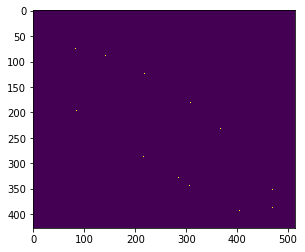

In [34]:
coor_matrix = str_volume[11,:,:]

plt.imshow( coor_matrix )

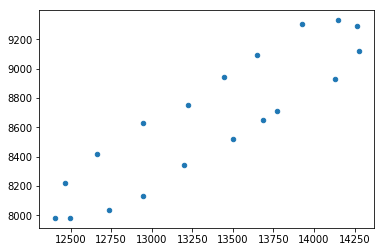

In [22]:
x_list = []
y_list = []
min_x = 9999999
min_y = 9999999
max_x = 0
max_y = 0


coor_list = str_contours_annotation[200]['12N'][1]
for x, y in coor_list:
    x_list.append(x)
    y_list.append(y)

plt.scatter(x_list, y_list, s=20)

# Need to: design function that fills in all points in between

In [39]:
#dense_coor_list = list( coor_list.copy() )
dense_coor_list = []
x_list = []
y_list = []
# Shortest distance, x, y


for x, y in coor_list:
    # Initialize as something ridiculous that will be immediatly overwritten
    shortest_dist_array = [9999999, 0, 0]
    
    dense_coor_list.append([x,y])
    
    for x_2, y_2 in coor_list:
        if x==x_2 and y==y_2:
            continue
            
        distance = ((x-x_2)**2 - (y-y_2)**2 )**0.5
        
        if distance < shortest_dist_array[0]:
            #print distance
            shortest_dist_array = [distance, x_2, y_2]
    
    # Now add coordinates to dense_coor_list
    distance, x_close, y_close = shortest_dist_array
    
    if distance>50:
        print 'COORDINATES'
        print x_close
        print y_close
        print x
        print y
    
#     x_mid = x + np.abs(x_close-x)/2
    x_mid = (x+x_close)/2
    y_mid = (y+y_close)/2
    
    dense_coor_list.append( [x_mid, y_mid] )
    
    x_list.append(x)
    y_list.append(y)

COORDINATES
13685.941228374788
8645.917200910983
13772.240714804844
8709.296961776698
COORDINATES
13772.240714804844
8709.296961776698
14130.054571553286
8930.89770740952
COORDINATES
13772.240714804844
8709.296961776698
14277.408669932953
9118.307215987226
COORDINATES
14147.619168459958
9329.158547036765
14262.167404266238
9287.262745238659
COORDINATES
12944.52043864461
8129.52812630661
14147.619168459958
9329.158547036765
COORDINATES
13646.355705394068
9095.39872516958
13927.625688494678
9301.379684877478
COORDINATES
13448.159442641116
8943.250752308388
13646.355705394068
9095.39872516958
COORDINATES
13221.127071490904
8752.980945484323
13448.159442641116
8943.250752308388
COORDINATES
13448.159442641116
8943.250752308388
13221.127071490904
8752.980945484323
COORDINATES
12662.086972247886
8417.48458518005
12943.383060194199
8629.838762515676
COORDINATES
12943.383060194199
8629.838762515676
12662.086972247886
8417.48458518005
COORDINATES
12736.999293058543
8034.778269364111
12466.881531

In [56]:
coor_list = str_contours_annotation[200]['12N'][1]

def get_dense_coordinates( coor_list ):
    dense_coor_list = []
    # Shortest distance, x, y

    #for x, y in coor_list:
    for i in range(len(coor_list)-1):
        x, y = coor_list[i]
        x_next, y_next = coor_list[i+1]
        
        x_mid = (x+x_next)/2
        y_mid = (y+y_next)/2
        
        
        dense_coor_list.append([x,y])
        dense_coor_list.append( [x_mid, y_mid] )
        
        if i==len(coor_list)-2:
            dense_coor_list.append( [x_next, y_next] )
            x, y = coor_list[0]
            x_mid = (x+x_next)/2
            y_mid = (y+y_next)/2
            dense_coor_list.append( [x_mid, y_mid] )
        
    return dense_coor_list

In [59]:
dense_coor_list = get_dense_coordinates( coor_list )
denser_coor_list = get_dense_coordinates( dense_coor_list )
densest_coor_list = get_dense_coordinates( denser_coor_list )

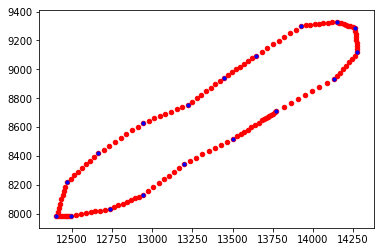

In [58]:
x_list_dense = []
y_list_dense = []

for x, y in densest_coor_list:
    x_list_dense.append(x)
    y_list_dense.append(y)

plt.scatter(x_list_dense, y_list_dense, s=20, c='r')
plt.scatter(x_list, y_list, s=10, c='b')

In [2]:
! aws s3 rm --recursive s3://test-bucket-sid/alex_neuroglancer_volumes

delete: s3://test-bucket-sid/alex_neuroglancer_volumes/human_annotations_5um/voxel_xyz_dimensions.txt
delete: s3://test-bucket-sid/alex_neuroglancer_volumes/offsets/10N_L_offsets.txt
delete: s3://test-bucket-sid/alex_neuroglancer_volumes/offsets/10N_R_offsets.txt
delete: s3://test-bucket-sid/alex_neuroglancer_volumes/offsets/3N_R_offsets.txt
delete: s3://test-bucket-sid/alex_neuroglancer_volumes/offsets/12N_offsets.txt
delete: s3://test-bucket-sid/alex_neuroglancer_volumes/human_annotations_5um/volume.npy
delete: s3://test-bucket-sid/alex_neuroglancer_volumes/offsets/4N_R_offsets.txt
delete: s3://test-bucket-sid/alex_neuroglancer_volumes/offsets/4N_L_offsets.txt
delete: s3://test-bucket-sid/alex_neuroglancer_volumes/human_annotations_5um/volume_colored.npy
delete: s3://test-bucket-sid/alex_neuroglancer_volumes/offsets/3N_L_offsets.txt
delete: s3://test-bucket-sid/alex_neuroglancer_volumes/offsets/5N_L_offsets.txt
delete: s3://test-bucket-sid/alex_neuroglancer_volumes/offsets/5N_R_offse

delete: s3://test-bucket-sid/alex_neuroglancer_volumes/volumes/VCP_R_volume.npy
delete: s3://test-bucket-sid/alex_neuroglancer_volumes/volumes/VLL_L_volume.npy
delete: s3://test-bucket-sid/alex_neuroglancer_volumes/volumes/VLL_R_volume.npy


In [3]:
! aws s3 cp --recursive /home/alexn/Desktop/neuroglancer_binary_volumes/ s3://test-bucket-sid/alex_neuroglancer_volumes

upload: ../../../Desktop/neuroglancer_binary_volumes/MD585/human_annotations_5um/voxel_xyz_dimensions.txt to s3://test-bucket-sid/alex_neuroglancer_volumes/MD585/human_annotations_5um/voxel_xyz_dimensions.txt
upload: ../../../Desktop/neuroglancer_binary_volumes/MD585/human_annotations_5um/volume.npy to s3://test-bucket-sid/alex_neuroglancer_volumes/MD585/human_annotations_5um/volume.npy
upload: ../../../Desktop/neuroglancer_binary_volumes/MD585/human_annotations_5um/volume_colored.npy to s3://test-bucket-sid/alex_neuroglancer_volumes/MD585/human_annotations_5um/volume_colored.npy


# End Neuroglancer Code

In [14]:
# Resets the viewer
with viewer.txn() as s:
    # Resets X/Y/Z plane orientation
    s.navigation.pose.orientation = [0,0,0,1]
    # Zooms out 
    s.navigation.zoomFactor = 10000
    
    # Resets 3D Viewer Orientation
    s.perspectiveOrientation = [0,0,0,1]
    # Zooms out
    s.perspectiveZoom = 75000
    
    # Not necessary, just restates the voxel sizes of the image
    s.navigation.pose.position.voxelSize = [460,460,20000]
    # Sets Viewer's center location
    s.navigation.pose.position.voxelCoordinates = [8192,6000,134]

In [ ]:
# wholeslice_to_brainstem = -from_padded_to_wholeslice, from_padded_to_brainstem

#from_padded_to_wholeslice
rostral_limit = 50
caudal_limit = 1188
dorsal_limit = 21
ventral_limit = 738

#from_padded_to_brainstem
rostral_limit = 521
caudal_limit = 1057
dorsal_limit = 128
ventral_limit = 465

In [ ]:
fp_volumes = '/home/alexn/Desktop/neuroglancer_binary_volumes/volumes_'+xy_ng_resolution_um+'um/'
np.save( fp_volumes+structure+'_volume.npy',structure_volume)